In [6]:
import sys, os
sys.path.append('/user_data/mmhender/imStat/code/')
from utils import default_paths, prf_utils, nsd_utils, roi_utils
from model_fitting import initialize_fitting
import h5py
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats


In [3]:
subject = 1
fn = os.path.join(default_paths.stim_root, 'S%d_ranked_images.csv'%subject)
print('Loading from %s'%fn)
rank_df = pd.read_csv(fn,index_col=0)
rank_df

Loading from /user_data/mmhender/nsd_stimuli/stimuli/S1_ranked_images.csv


,voxel 0,voxel 1,voxel 2,voxel 3,voxel 4,voxel 5,voxel 6,voxel 7,voxel 8,voxel 9,...,voxel 19728,voxel 19729,voxel 19730,voxel 19731,voxel 19732,voxel 19733,voxel 19734,voxel 19735,voxel 19736,voxel 19737
0,2529,2083,2054,7918,7514,4158,4659,630,2451,1056,...,4719,6708,6136,8493,3917,2717,3598,2696,2409,2887
1,7918,2843,7795,7234,2083,885,7234,6302,2347,6800,...,6708,7234,4068,2696,6708,5242,3676,6708,1008,4637
2,3997,7874,9933,2503,7795,2529,2617,3922,7769,6590,...,2102,6965,9329,9675,2715,3716,34,3676,4480,3766
3,3887,3523,3136,1765,754,7402,1917,8964,4889,879,...,5242,5242,993,7368,8906,2020,2761,7565,9900,4791
4,3915,2796,4995,6104,7607,4768,6661,5242,5540,5510,...,6965,3676,6708,2532,7607,9329,8798,5242,7966,9254
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9394,8831,5688,2116,6394,7261,6870,7446,8357,2962,...,8969,1246,2232,6705,5662,6287,3672,1289,9672,5640
9996,225,5744,4927,1013,2486,225,9847,205,2674,3741,...,6401,602,1246,4032,1633,351,6953,9013,4228,4495
9997,7082,6532,2550,4275,7144,9736,7029,7648,9673,9605,...,5235,5034,4241,3795,1317,5375,7661,3087,1879,9672
9998,9847,8129,4461,8089,4538,3225,406,4834,319,9792,...,7022,246,5375,791,987,5052,1889,8784,2042,2042


In [37]:
vkeys = list(rank_df.keys())
vnums = [int(vkey[6:]) for vkey in vkeys]
np.max(vnums)

19737

In [4]:
image_data = nsd_utils.get_image_data(subject)
image_data = nsd_utils.image_uncolorize_fn(image_data)


Loading images for subject 1

image data size: (10000, 3, 240, 240) , dtype: uint8 , value range: 0 255


In [28]:
out['best_params'][0].shape

(19738, 1, 3)

In [23]:
# Load results of fitting encoding model, to get pRF params

from plotting import load_fits
subject = 1
volume_space=True
fitting_type = 'sketch_tokens'

root = os.path.dirname(os.path.dirname(os.getcwd()))
out, fig_save_folder = load_fits.load_fit_results(subject, volume_space, fitting_type, \
                                                  n_from_end=1, root=root, verbose=True);

roi_def = roi_utils.get_combined_rois(subject,include_all=True,include_body=True,volume_space=True,verbose=False) 
skip_inds = [10,11,15,23]
retlabs, facelabs, placelabs, bodylabs, \
        ret_names, face_names, place_names, body_names = roi_def
nret = len(ret_names)
nface = len(face_names)
nplace = len(place_names)
nbody = len(body_names)    
n_rois = len(ret_names) + len(face_names) + len(place_names) + len(body_names)
roi_names = ret_names+face_names+place_names+body_names

is_ret = np.arange(0, n_rois)<nret
is_face = (np.arange(0, n_rois)>=nret) & (np.arange(0, n_rois)<nret+nface)
is_place = (np.arange(0, n_rois)>=nret+nface) & (np.arange(0, n_rois)<nret+nface+nplace)
is_body = np.arange(0, n_rois)>=nret+nface+nplace


loading from /user_data/mmhender/imStat/model_fits/S01/sketch_tokens/Nov-11-2021_1659_27/all_fit_params

dict_keys(['subject', 'volume_space', 'fitting_type', 'fitting_type2', 'voxel_mask', 'brain_nii_shape', 'image_order', 'voxel_index', 'voxel_roi', 'voxel_ncsnr', 'aperture', 'aperture_rf_range', 'which_prf_grid', 'models', 'best_losses', 'best_lambdas', 'best_params', 'lambdas', 'val_cc', 'val_r2', 'partial_masks', 'partial_version_names', 'zscore_features', 'zscore_in_groups', 'ridge', 'debug', 'up_to_sess', 'single_sess', 'shuff_rnd_seed', 'use_precomputed_prfs', 'corr_each_feature', 'min_pct_var', 'max_pc_to_retain', 'use_pca_st_feats', 'use_lda_st_feats', 'lda_discrim_type'])


In [24]:
out['which_prf_grid']

5

In [63]:
# Choose an example voxel to work with
rr = 18
if is_ret[rr]:
    inds_this_roi = retlabs==rr
elif is_face[rr]:
    inds_this_roi = facelabs==(rr-nret)
elif is_place[rr]:
    inds_this_roi = placelabs==(rr-nret-nface)
elif is_body[rr]:
    inds_this_roi = bodylabs==(rr-nret-nface-nplace)

this_roi = np.where(inds_this_roi)[0]
vind = np.flip(np.argsort(out['val_cc'][this_roi,0]))[1]
vind = this_roi[vind]
print(vind)
name = roi_names[rr]
print(name)

12927
PPA


number of pRFs: 1456
most extreme RF positions:
[2.7755576e-17 0.0000000e+00 2.0000000e-02]
[ 0.7698996  -0.31890285  1.        ]


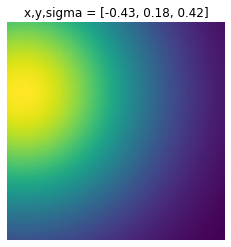

In [64]:
which_prf_grid=5

_, models = initialize_fitting.get_prf_models(aperture_rf_range=1.1, which_grid=which_prf_grid)

mm = out['best_params'][5][vind,0]

x,y,sigma = models[mm,:]
n_pix = 240
prf_2d = prf_utils.gauss_2d(center=[x,y], sd=sigma, patch_size=n_pix)

plt.figure();
plt.pcolormesh(prf_2d)
plt.axis('off')
plt.axis('square')
plt.gca().invert_yaxis()
plt.title('x,y,sigma = [%.2f, %.2f, %.2f]'%(x,y,sigma));

Text(0.5, 0.98, 'voxel 12927, PPA')

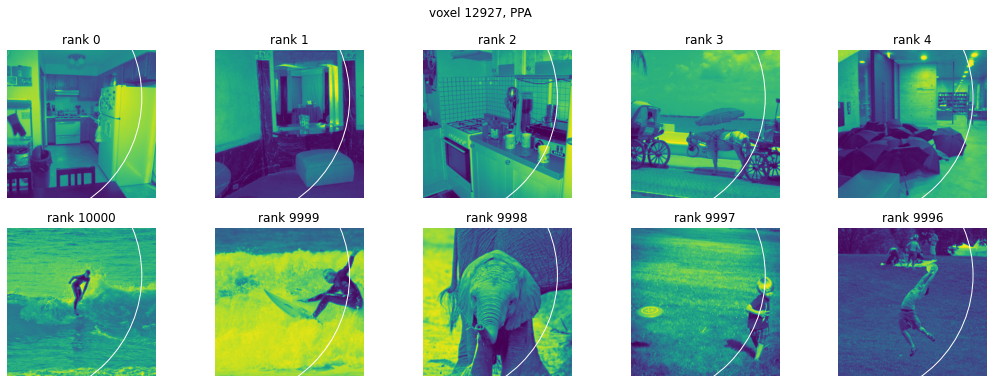

In [66]:
top_n = 5
top_trials = np.array(rank_df['voxel %d'%vind])[0:top_n]
bottom_trials = np.flip(np.array(rank_df['voxel %d'%vind]))[0:top_n]
# top_resp = trn_resp[top_trials]
# bottom_resp = trn_resp[bottom_trials]
top_images = image_data[top_trials,0,:,:]
bottom_images = image_data[bottom_trials,0,:,:]

# invert y direction here for imshow
center_in_image = np.array((n_pix/2 + x*n_pix, n_pix/2 - n_pix*y))
size_in_image = 2*sigma*n_pix

plt.figure(figsize=(18,6));
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1);
    plt.imshow(top_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('rank %d'%ii)
for ii in range(top_n):
    ax = plt.subplot(2,top_n,ii+1+top_n);    
    plt.imshow(bottom_images[ii,:,:])
    circ = matplotlib.patches.Circle(center_in_image, size_in_image, 
                                                 color = 'w', fill=False)
    ax.add_artist(circ)
    plt.axis('off')
    plt.title('rank %d'%(10000-ii))
#     plt.title('resp=%.2f'%bottom_resp[ii])
plt.suptitle('voxel %d, %s'%(vind, name))
# print(prf_params)